# Analyzing IMDB Data in Keras

In [1]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

c:\users\hare krishna\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 1. Loading the data
This dataset comes preloaded with Keras, so one simple command will get us training and testing data. There is a parameter for how many words we want to look at. We've set it at 1000, but feel free to experiment.

In [2]:
# Loading the data (it's preloaded in Keras)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1500)

print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


## 2. Examining the data
Notice that the data has been already pre-processed, where all the words have numbers, and the reviews come in as a vector with the words that the review contains. For example, if the word 'the' is the first one in our dictionary, and a review contains the word 'the', then there is a 1 in the corresponding vector.

The output comes as a vector of 1's and 0's, where 1 is a positive sentiment for the review, and 0 is negative.

In [3]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


## 3. One-hot encoding the output
Here, we'll turn the input vectors into (0,1)-vectors. For example, if the pre-processed vector contains the number 14, then in the processed vector, the 14th entry will be 1.

In [4]:
# One-hot encoding the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=1500)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


And we'll also one-hot encode the output.

In [5]:
# One-hot encoding the output
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(25000, 2)
(25000, 2)


## 4. Building the  model architecture
Build a model here using sequential. Feel free to experiment with different layers and sizes! Also, experiment adding dropout to reduce overfitting.

In [6]:
# TODO: Build the model architecture
model = Sequential()
model.add(Dense(512, input_dim=1500, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

#TODO: Compile the model using a loss function and an optimizer.
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               768512    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1026      
Total params: 769,538
Trainable params: 769,538
Non-trainable params: 0
_________________________________________________________________


## 5. Training the model
Run the model here. Experiment with different batch_size, and number of epochs!

In [7]:
# TODO: Run the model. Feel free to experiment with different batch sizes and number of epochs.
hist = model.fit(x_train, y_train, validation_split=0.2 ,epochs=15, batch_size=120)

Train on 20000 samples, validate on 5000 samples
Epoch 1/15
20000/20000 [==============================] - 6s 310us/step - loss: 0.4402 - acc: 0.8119 - val_loss: 0.3269 - val_acc: 0.8632
Epoch 2/15
20000/20000 [==============================] - 6s 294us/step - loss: 0.3173 - acc: 0.8636 - val_loss: 0.3081 - val_acc: 0.8744
Epoch 3/15
20000/20000 [==============================] - 6s 295us/step - loss: 0.2995 - acc: 0.8734 - val_loss: 0.3236 - val_acc: 0.8636
Epoch 4/15
20000/20000 [==============================] - 6s 293us/step - loss: 0.2854 - acc: 0.8819 - val_loss: 0.3066 - val_acc: 0.8712
Epoch 5/15
20000/20000 [==============================] - 6s 294us/step - loss: 0.2805 - acc: 0.8834 - val_loss: 0.3044 - val_acc: 0.8712
Epoch 6/15
20000/20000 [==============================] - 6s 296us/step - loss: 0.2742 - acc: 0.8861 - val_loss: 0.3125 - val_acc: 0.8696
Epoch 7/15
20000/20000 [==============================] - 6s 296us/step - loss: 0.2676 - acc: 0.8894 - val_loss: 0.3263 - v

## 6. Evaluating the model
This will give you the accuracy of the model, as evaluated on the testing set. Can you get something over 85%?

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: ", score[1])

Accuracy:  0.86508


In [9]:
hist.history.keys()

dict_keys(['val_acc', 'loss', 'val_loss', 'acc'])

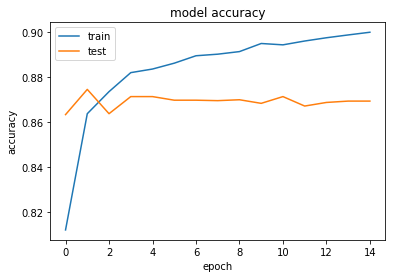

In [10]:
# Summarize History for Accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

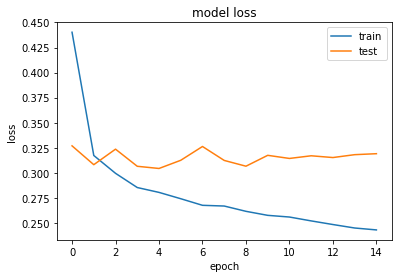

In [11]:
# Summarize History for Loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()